In [1]:
import matplotlib.pyplot as plt
import numpy as np

from rcsj_sde import utils

%load_ext autoreload
%autoreload 2

## Theoretical I-V curves in the overdamped limit

Reproducing Fig. 3.18 in the textbook Applied Superconductivity by Prof. Dr. Rudolf Gross and  Dr. Achim Marx:

https://www.wmi.badw.de/fileadmin/WMI/Lecturenotes/Applied_Superconductivity/AS_Chapter3.pdf

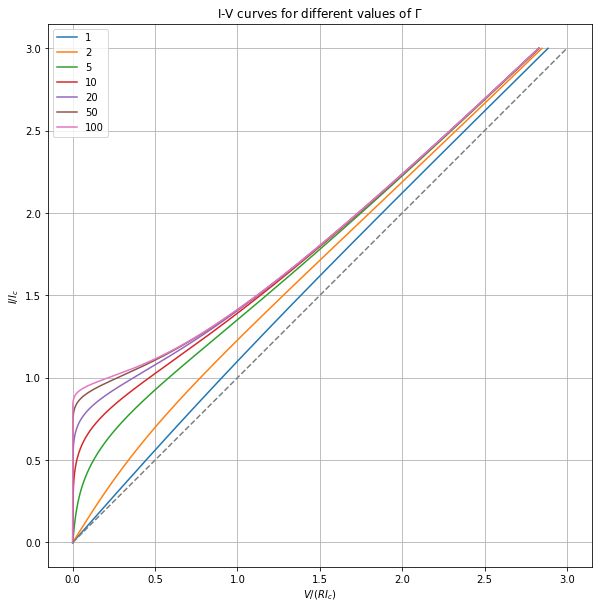

In [2]:
Ic = 1e-6
R = 10
I_DC_range = np.linspace(0, 3*Ic, 200)

plt.figure(figsize=(10,10))


gammas = [ 1, 2, 5, 10, 20, 50, 100]

for gamma in gammas:
    plt.plot(utils.ambegaokar_overdamped(I_DC_range, Ic, R, gamma0=gamma)/(Ic*R), I_DC_range/Ic, label=f'{gamma:.0f}')
    
plt.plot(I_DC_range*R/(Ic*R), I_DC_range/(Ic), "--") # linear overlay
plt.gca().set_aspect(1)
plt.legend(loc='best')
plt.ylabel('$I/I_c$')
plt.xlabel('$V/(R I_c)$')
plt.title(r'I-V curves for different values of $\Gamma$')
plt.grid()

In [3]:
# a single point
utils.ambegaokar_overdamped(2*Ic, Ic, R, gamma0=50)/(Ic*R)

1.7322682165235468

## Thermal noise power

Spectral density in dBm/Hz at a given temperature.


In [8]:
Ts = [0.01, 0.05, 0.4, 1]

for T in Ts:
    P = utils.thermal_noise_power(T=T)
    print(f"T = {T:0.3f} K --> P = {utils.watt_to_dbm(P):.3g} dBm/Hz ")

T = 0.010 K --> P = -213 dBm/Hz 
T = 0.050 K --> P = -206 dBm/Hz 
T = 0.400 K --> P = -197 dBm/Hz 
T = 1.000 K --> P = -193 dBm/Hz 
